In [2]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
filename = r"Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2"

In [4]:
basedata = radar_io(filename) 

In [5]:
sradar = basedata.ToPyartRadar()

In [6]:
import matplotlib.pyplot as plt

8933 total observations (M)


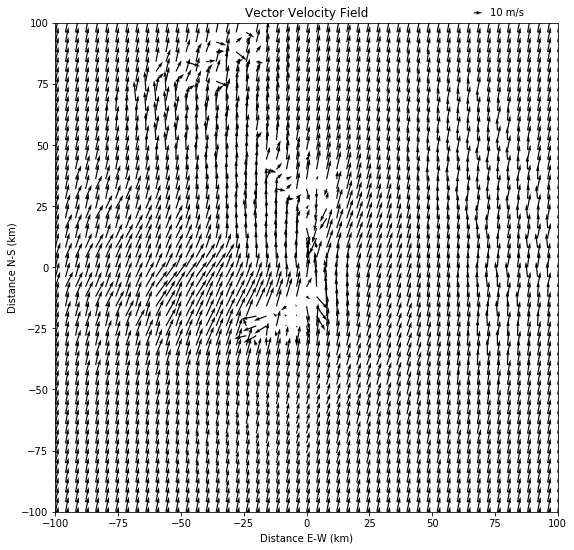

In [8]:
import singledop

wind = singledop.SingleDoppler2D(radar=sradar, 
                                 grid_spacing=0.25,
                                 L=1, 
                                 sweep_number=1, 
                                 name_vr='velocity',
                                 thin_factor=[4, 4],
                                 grid_edge=120,
                                 sigma=1
                                 )

swdisplay = singledop.AnalysisDisplay(wind)

fig, ax = plt.subplots(figsize=(9, 9))
swdisplay.plot_velocity_vectors(ax=ax, legend=10)

ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])

fig.savefig('sa_wind.png', dpi=300, bbox_inches='tight')

In [9]:
import singledop
sd_test = singledop.SingleDoppler2D(L=30.0, radar=sradar, range_limits=[0, 100],
                                    sweep_number=0, 
                                    thin_factor=[4, 12])

3016 total observations (M)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


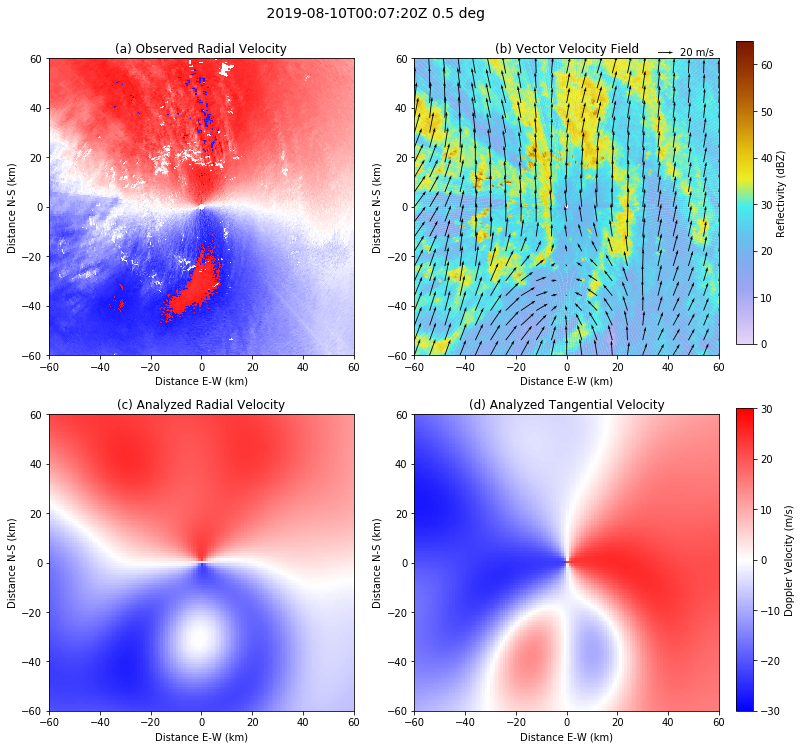

In [10]:


display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=400, legend=20, return_flag=False, thin=6,
                        levels=-30.0+2.0*np.arange(31))



In [1]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart

f1 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
f2 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"
basedata1 = radar_io(f1) 
basedata2 = radar_io(f2)

r1 = basedata1.ToPyartRadar()
r2 = basedata2.ToPyartRadar()


cp1 = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp1, replace_existing=True)
gatefilter1 = pyart.correct.GateFilter(r1)
gatefilter1.exclude_masked('reflectivity')
corr_vel1 = pyart.correct.dealias_region_based(
    r1, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter1, centered=True)
r1.add_field('VT', corr_vel1, replace_existing=True)



cp2 = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp2, replace_existing=True)
gatefilter2 = pyart.correct.GateFilter(r2)
gatefilter2.exclude_masked('reflectivity')
corr_vel2 = pyart.correct.dealias_region_based(
    r2, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter2, centered=True)
r2.add_field('VT', corr_vel2, replace_existing=True)



# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']

radars1 =[r1]
grids1 = pyart.map.grid_from_radars(
         radars1, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
        fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')

radars2 =[r2]
grids2 = pyart.map.grid_from_radars(
         radars2, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
        fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/inference.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.a

In [20]:
import singledop
sd_test = singledop.SingleDoppler2D(L=10.0, radar=r2, grid_edge=150,
                                    sweep_number=0, name_vr='VT',
                                    thin_factor=[4, 12])

2907 total observations (M)


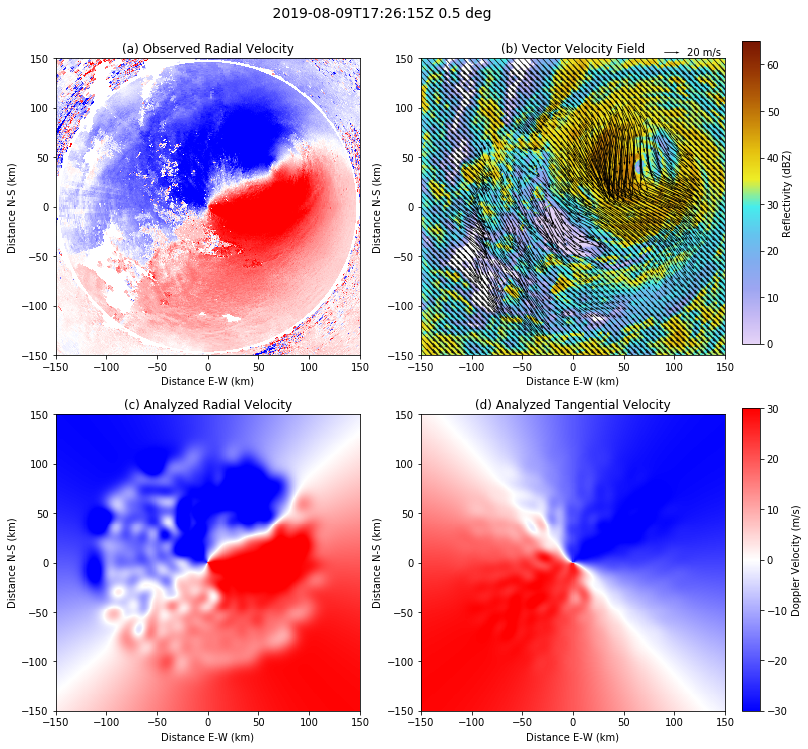

In [21]:
display = singledop.AnalysisDisplay(sd_test)

display.four_panel_plot(scale=400, legend=20, return_flag=False, thin=6,
                        levels=-30.0+2.0*np.arange(31), name_vr='VT', name_dz='DT')